# K-Means clustering algorithm with the Iris dataset.

by Torey Hilbert (June to December 2017)

The key parameters for clustering are a distance measure and the number of clusters (the k). I sampled a few distance metrics, but settled for the Manhattan distance. I found 9 clusters gave the highest accuracy. 

Data: In the Iris dataset each row represents a unique iris flower, including its sepal length, sepal width, pedal width, and species. The target is to accurately predict/group by plant species. My code loads this dataset from the sklearn library (iris dataset), but the same data is also available from UCI ML: http://archive.ics.uci.edu/ml/datasets/Iris

In [1]:
from __future__ import division
import math
import random
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris #Used to load the iris dataset
_iris = load_iris()
print _iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [2]:
class Flower:
    def __init__(self, sepalLength, sepalWidth, petalLength, petalWidth, name):
        self.sepalLength = sepalLength
        self.sepalWidth = sepalWidth
        self.petalLength = petalLength
        self.petalWidth = petalWidth
        #This is the number of the cluster closest to this flower. A cluster of -1 means no assigned cluster
        self.cluster = -1
        self.name = name

    #Makes it easy to iterate across the data in the Flower
    def info(self):
        return [self.sepalLength, self.sepalWidth, self.petalLength, self.petalWidth]

    #Finds the clostest cluster and assigns itself to it
    def findCluster(self, clusters):
        self.cluster = clusters[0].clusterNumber
        distance = clusters[0].d_toMean(self.info())
        for cluster in clusters:
            if cluster.d_toMean(self.info()) < distance:
                self.cluster = cluster.clusterNumber
                distance = cluster.d_toMean(self.info())

In [3]:
#Set up train / test data
iris = []
test = []
for i in range(len(_iris.data)):
    if (i % 4 == 0):
        flower = _iris.data[i]
        test.append(Flower(flower[0], flower[1], flower[2], flower[3], _iris.target[i]))
    else:
        flower = _iris.data[i]
        iris.append(Flower(flower[0], flower[1], flower[2], flower[3], _iris.target[i]))

In [4]:
# These are the functions to define distance, although these are basic, if there were to be non numerical data this would be necessary
def d_sepalLength(a, b):
    return abs(a - b)

def d_sepalWidth(a, b):
    return abs(a - b)

def d_petalLength(a, b):
    return abs(a - b)

def d_petalWidth(a, b):
    return abs(a - b)

#Distance functions, used to iterate across the info in the flowers
dfs =  [d_sepalLength, d_sepalWidth, d_petalLength, d_petalWidth]

In [5]:
class Cluster:
    distanceFunctions = dfs
    members = []
    avgMemberType = -1
    #To begin, assign each cluster a data point to start at
    def __init__(self, clusterNumber, initialInfo):
        self.clusterNumber = clusterNumber
        self.mean = initialInfo

    #Adjusts the mean to accurately reflect the members of the cluster
    def recenter (self):
        if (len(self.members) != 0):
            for i in range(len(self.mean)):
                s = 0
                for member in self.members:
                    s = s + member.info()[i]
                self.mean[i] = s / len(self.members)

    #Finds the distance from a random flower to the mean of the cluster
    def d_toMean(self, flowerInfo):
        return sum( df_i(f_i, m_i) for (df_i, f_i, m_i) in zip(self.distanceFunctions, flowerInfo, self.mean))

    #Finds average flower type of the cluster, uses this value to predict the flower type of an unknown member of the cluster
    def averageMember(self):
        counts = [0, 0, 0]
        for flower in self.members:
            counts[flower.name] += 1
        self.avgMemberType = counts.index(max(counts))
        return self.avgMemberType

In [6]:
#This sets up the Clusters, randomly assigning a random flower to each cluster
def setupClusters(numClusters):
    clusters = []
    for i in range(numClusters):
        random_flower = iris[random.randint(0, len(iris) - 1)]
        cluster = Cluster(i, random_flower.info())
        clusters.append(cluster)
    return clusters

In [7]:
#This is the training of the data
def assignToClusters(clusters):
    for i in range(len(clusters)):
        clusters[i].members = []
    for flower in iris:
        flower.findCluster(clusters)
        clusters[flower.cluster].members.append(flower)

In [8]:
#This actually runs the algorithm
def runClusters_n(numClusters):
    clusters_n = setupClusters(numClusters)
    for n in range(30):
        assignToClusters(clusters_n)
        for i in range(len(clusters_n)):
            clusters_n[i].recenter()
    for i in range(len(clusters_n)):
        clusters_n[i].averageMember()
    test_score = 0
    for flower in test:
        flower.findCluster(clusters_n)
        if (clusters_n[flower.cluster].avgMemberType == flower.name):
            test_score += 1
    return test_score / len(test)

3  clusters gives an accuracy of  0.917368421053
4  clusters gives an accuracy of  0.892105263158
5  clusters gives an accuracy of  0.927894736842
6  clusters gives an accuracy of  0.943684210526
7  clusters gives an accuracy of  0.967894736842
8  clusters gives an accuracy of  0.973684210526
9  clusters gives an accuracy of  0.972105263158
10  clusters gives an accuracy of  0.973157894737
11  clusters gives an accuracy of  0.974736842105
12  clusters gives an accuracy of  0.971052631579
13  clusters gives an accuracy of  0.97
14  clusters gives an accuracy of  0.971578947368
15  clusters gives an accuracy of  0.974736842105
16  clusters gives an accuracy of  0.971578947368
17  clusters gives an accuracy of  0.972631578947
18  clusters gives an accuracy of  0.973684210526
19  clusters gives an accuracy of  0.97


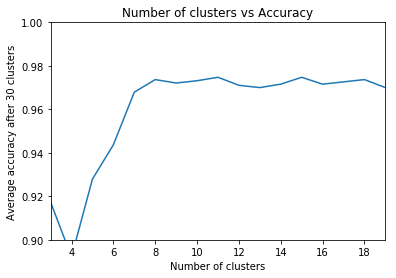

In [9]:
#Runs the clustering algorithm from random starting positions 50 times for every number of clusters 3 to 19, and subsequently uses those to predict the flower type of all 38 elements of the test data (set asside at the beginning for that purpose). Takes the average accuracy from those 30 trials and displays it here, then graphs.

#This will be a list of accuracies, with index being number of clusters used.
nclusters = [0, 0, 0]
for i in range(3, 20):
    nclusters.append(0)
    # Repeat the aglorithm 50 times with i clusters
    for n in range(50):
        nclusters[i] += runClusters_n(i)
    nclusters[i] /= 50 # We are taking the average of 50 trials
    print i, " clusters gives an accuracy of ", nclusters[i]

plt.plot(range(3,20), nclusters[3:20])
plt.title("Number of clusters vs Accuracy")
plt.ylabel("Average accuracy after 30 clusters")
plt.xlabel("Number of clusters")
plt.axis([3, 19, 0.90, 1.00])
plt.show()

From the above, we see that the accuracy peaks at around $97\%$ with 9 clusters. However, on occasion cluster numbers greater than 9 produce similar or higher accuracies. There are two reasons that 9 clusters is better however. First of all, "overfitting" can be an issue. Overfitting is when you model every little detail of a dataset too closely. If there is an outlier in your training set and you overfit the data, your model will always predict normal samples incorrectly if it is similar to some of the outliers. This is dangerous, and as such should be avoided. With too many clusters, we run the risk of doing that with our samples here. Another reason is that as we increase the number of clusters, not all the clusters are actually being used. With another example, we can see what is going on there. Several of the initial clusters are becoming nearly empty. To demonstrate this, we will count, on average, how many clusters become nearly empty, having 2 or fewer members in it by the end of the recentering process when starting with various numbers of clusters.

The average number of empty clusters is  0.0  when starting with  3  clusters
The average number of empty clusters is  0.0  when starting with  4  clusters
The average number of empty clusters is  0.05  when starting with  5  clusters
The average number of empty clusters is  0.05  when starting with  6  clusters
The average number of empty clusters is  0.05  when starting with  7  clusters
The average number of empty clusters is  0.05  when starting with  8  clusters
The average number of empty clusters is  0.35  when starting with  9  clusters
The average number of empty clusters is  0.3  when starting with  10  clusters
The average number of empty clusters is  0.35  when starting with  11  clusters
The average number of empty clusters is  1.2  when starting with  12  clusters
The average number of empty clusters is  0.8  when starting with  13  clusters
The average number of empty clusters is  1.2  when starting with  14  clusters
The average number of empty clusters is  1.3  when st

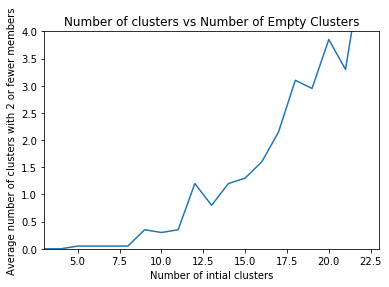

In [10]:
#Checks number of empty clusters and plots
nclusters = [0, 0, 0]
for n in range(3, 24):
    emptyClusters = 0
    for i in range(20):
        clusters_n = setupClusters(n)
        for j in range(20):
            assignToClusters(clusters_n)
            for k in range(len(clusters_n)):
                clusters_n[k].recenter()
        for k in range(len(clusters_n)):
            if (len(clusters_n[k].members) < 3):
                emptyClusters += 1
    nclusters.append(emptyClusters / 20)
    print "The average number of empty clusters is ", emptyClusters / 20, " when starting with ", n, " clusters"

plt.plot(range(3,24), nclusters[3:24])
plt.title("Number of Clusters vs Number of Empty Clusters")
plt.ylabel("Average number of clusters with 2 or fewer members")
plt.xlabel("Number of intial clusters")
plt.axis([3, 23, 0, 4])
plt.show()